Exploring Data

In [24]:
import pandas as pd
mcdonalds= pd.read_csv('https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv')

In [3]:
mcdonalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
mcdonalds.shape

(1453, 15)

In [5]:
print(mcdonalds.columns.tolist()[0:11])
attribute_names=mcdonalds.columns.tolist()[0:11]

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']


In [6]:
MD_x = mcdonalds.iloc[:, 0:11].values

In [7]:
print(MD_x)

[['No' 'Yes' 'No' ... 'Yes' 'No' 'No']
 ['Yes' 'Yes' 'No' ... 'Yes' 'No' 'No']
 ['No' 'Yes' 'Yes' ... 'Yes' 'Yes' 'No']
 ...
 ['Yes' 'Yes' 'No' ... 'Yes' 'No' 'No']
 ['Yes' 'Yes' 'No' ... 'No' 'Yes' 'No']
 ['No' 'Yes' 'No' ... 'Yes' 'No' 'Yes']]


In [8]:
MD_x = (MD_x == "Yes").astype(int)
MD_x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [9]:
import numpy as np
col_means = np.round(np.mean(MD_x, axis=0), 2)

In [10]:
col_means

array([0.55, 0.91, 0.09, 0.87, 0.53, 0.9 , 0.6 , 0.64, 0.36, 0.2 , 0.24])

In [11]:
MD_x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

In [14]:
MD_pca

array([[ 0.42536706, -0.21907878,  0.6632553 , ...,  0.18100693,
         0.51570617, -0.56707389],
       [-0.21863768,  0.38818996, -0.73082668, ...,  0.11147641,
         0.49331285, -0.50044033],
       [ 0.37541475,  0.73043507, -0.12203978, ..., -0.32228786,
         0.06175857,  0.24274108],
       ...,
       [-0.18589445,  1.06266156,  0.22085675, ...,  0.03825472,
         0.05651822, -0.01279977],
       [-1.18206441, -0.03856977,  0.56156066, ...,  0.02226748,
        -0.00257265, -0.10531631],
       [ 1.55024186,  0.27503101, -0.01373727, ..., -0.13658866,
        -0.43279782, -0.45607556]])

In [15]:
MD_pca.shape

(1453, 11)

In [16]:
print("Importance of components:")
print("Standard Deviation:")
print(np.round(np.std(MD_pca, axis=0),5))
print("Proportion of Variance:")
print(np.round(pca.explained_variance_ratio_,5))
print("Cumulative Proportion:")
print(np.round(np.cumsum(pca.explained_variance_ratio_),5))

Importance of components:
Standard Deviation:
[0.75679 0.60725 0.50445 0.39866 0.33729 0.31017 0.2896  0.27503 0.26516
 0.24876 0.23682]
Proportion of Variance:
[0.29945 0.1928  0.13305 0.0831  0.05948 0.0503  0.04385 0.03955 0.03676
 0.03235 0.02932]
Cumulative Proportion:
[0.29945 0.49224 0.62529 0.70839 0.76787 0.81817 0.86201 0.90156 0.93832
 0.97068 1.     ]


In [17]:
print("Standard deviations (1, .., p= 11):")
print(np.round(pca.explained_variance_**(1/2), 1))
print("Rotation (n x k) =")
print(np.transpose(np.round(-pca.components_, 3)))

Standard deviations (1, .., p= 11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]
Rotation (n x k) =
[[ 0.477 -0.364  0.304 -0.055  0.308 -0.171  0.281 -0.013 -0.572  0.11
  -0.045]
 [ 0.155 -0.016  0.063  0.142 -0.278  0.348  0.06   0.113  0.018  0.666
   0.542]
 [ 0.006 -0.019  0.037 -0.198 -0.071  0.355 -0.708 -0.376 -0.4    0.076
  -0.142]
 [-0.116  0.034  0.322  0.354  0.073  0.407  0.386 -0.59   0.161  0.005
  -0.251]
 [-0.304  0.064  0.802 -0.254 -0.361 -0.209 -0.036  0.138  0.003 -0.009
  -0.002]
 [ 0.108  0.087  0.065  0.097 -0.108  0.595  0.087  0.628 -0.166 -0.24
  -0.339]
 [ 0.337  0.611  0.149 -0.119  0.129  0.103  0.04  -0.14  -0.076 -0.428
   0.489]
 [ 0.472 -0.307  0.287  0.003  0.211  0.077 -0.36   0.073  0.639 -0.079
  -0.02 ]
 [-0.329 -0.601 -0.024 -0.068  0.003  0.261  0.068 -0.03  -0.067 -0.454
   0.49 ]
 [ 0.214 -0.077 -0.192 -0.763 -0.288  0.178  0.35  -0.176  0.186  0.038
  -0.158]
 [-0.375  0.14   0.089 -0.37   0.729  0.211  0.027  0.167  0.072  0.29
   0.041]]

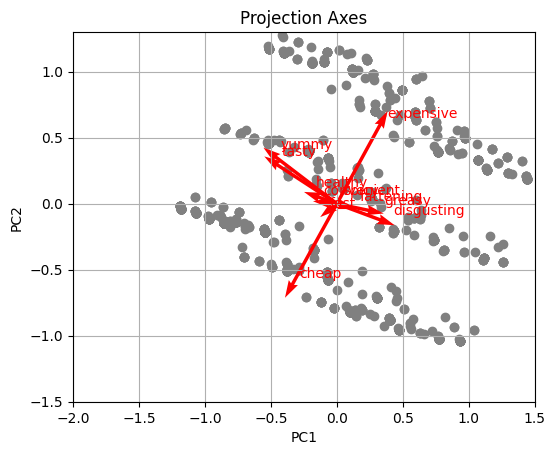

In [18]:
import matplotlib.pyplot as plt
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

plt.quiver(np.zeros(eigenvectors.shape[1]), np.zeros(eigenvectors.shape[1]), eigenvectors[0], eigenvectors[1], color='red', scale=3)
for i, attribute in enumerate(attribute_names):
    plt.annotate(attribute, xy=(eigenvectors[0, i], eigenvectors[1, i]), xytext=(5, 5), textcoords='offset points', color='red', fontsize=10)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection Axes')
plt.xlim(-2.0, 1.5)
plt.ylim(-1.5, 1.3)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()

Extracting Segments: Using k-Means

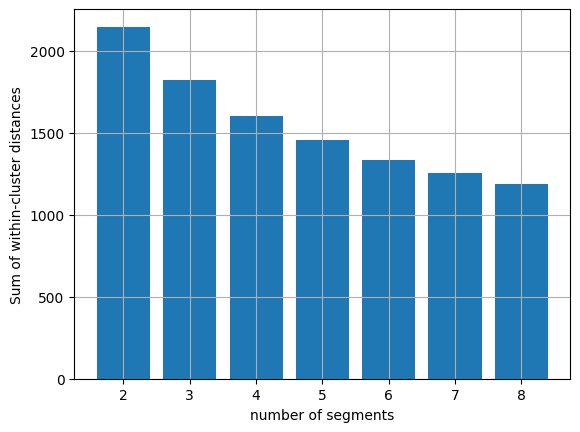

In [19]:
from sklearn.cluster import KMeans
from sklearn.utils import check_random_state

random_state = check_random_state(1234)

k_values = range(2, 9)
nrep = 10

within_cluster_distances = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=random_state, n_init=nrep)
    kmeans.fit(MD_x)
    within_cluster_distances.append(kmeans.inertia_)

plt.bar(k_values, within_cluster_distances)
plt.xlabel("number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.grid(True)
plt.show()

Extracting Segments: Using Mixtures of Regression Models

In [20]:
table = pd.value_counts(mcdonalds['Like'])
print(table)

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64


In [21]:
import re
mcdonalds['like_n'] = mcdonalds['Like'].apply(lambda x: int(re.findall(r'-?\d+', str(x))[0]) if isinstance(x, str) and re.findall(r'-?\d+', str(x)) else x)
mcdonalds['like_n'] = pd.to_numeric( mcdonalds['like_n'], errors='coerce')


In [22]:
mcdonalds['yummy'] =  mcdonalds['yummy'].map({'Yes': 1, 'No': 0})
mcdonalds['convenient'] =  mcdonalds['convenient'].map({'Yes': 1, 'No': 0})
mcdonalds['spicy'] =  mcdonalds['spicy'].map({'Yes': 1, 'No': 0})
mcdonalds['fattening'] =  mcdonalds['fattening'].map({'Yes': 1, 'No': 0})
mcdonalds['greasy'] =  mcdonalds['greasy'].map({'Yes': 1, 'No': 0})
mcdonalds['fast'] =  mcdonalds['fast'].map({'Yes': 1, 'No': 0})
mcdonalds['cheap'] =  mcdonalds['cheap'].map({'Yes': 1, 'No': 0})
mcdonalds['tasty'] =  mcdonalds['tasty'].map({'Yes': 1, 'No': 0})
mcdonalds['expensive'] =  mcdonalds['expensive'].map({'Yes': 1, 'No': 0})
mcdonalds['healthy'] =  mcdonalds['healthy'].map({'Yes': 1, 'No': 0})
mcdonalds['disgusting'] =  mcdonalds['disgusting'].map({'Yes': 1, 'No': 0})


In [23]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression

np.random.seed(1234)

formula = 'like_n = yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting'

n_components = 2
n_restarts = 10

X = mcdonalds[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']].values
y = mcdonalds['like_n'].values

gmm = GaussianMixture(n_components=n_components, n_init=n_restarts)

gmm.fit(X)

cluster_labels = gmm.predict(X)

linear_regressions = []
for cluster in range(n_components):
    
    cluster_data = X[cluster_labels == cluster]
    cluster_target = y[cluster_labels == cluster]
    
    linear_regression = LinearRegression()
    linear_regression.fit(cluster_data, cluster_target)
    
    linear_regressions.append(linear_regression)


MD_reg2 = {'Cluster_Labels': cluster_labels, 'Linear_Regressions': linear_regressions}

print(MD_reg2)


{'Cluster_Labels': array([1, 1, 1, ..., 1, 1, 0], dtype=int64), 'Linear_Regressions': [LinearRegression(), LinearRegression()]}
